# Time-Series Analysis

In [ ]:
# install the package and its requirements
%pip install nycschools

In [2]:
import pandas as pd
from nycschools import schools, exams

In [3]:
# school demographics in one frame
demo = schools.load_school_demographics()


In [4]:
# subset the data to only include the columns we need
demo = demo[['dbn', 'beds', 'zip', 'district', 'geo_district', 'boro', 'school_name',
       'short_name', 'ay', 'year', 'school_type', 'total_enrollment',
       'female_n', 'female_pct', 'male_n',
       'male_pct', 'asian_n', 'asian_pct', 'black_n', 'black_pct',
       'hispanic_n', 'hispanic_pct', 'multi_racial_n', 'multi_racial_pct',
       'native_american_n', 'native_american_pct', 'white_n', 'white_pct',
       'missing_race_ethnicity_data_n', 'missing_race_ethnicity_data_pct',
       'swd_n', 'swd_pct', 'ell_n', 'ell_pct', 'poverty_n', 'poverty_pct',
       'eni_pct']]


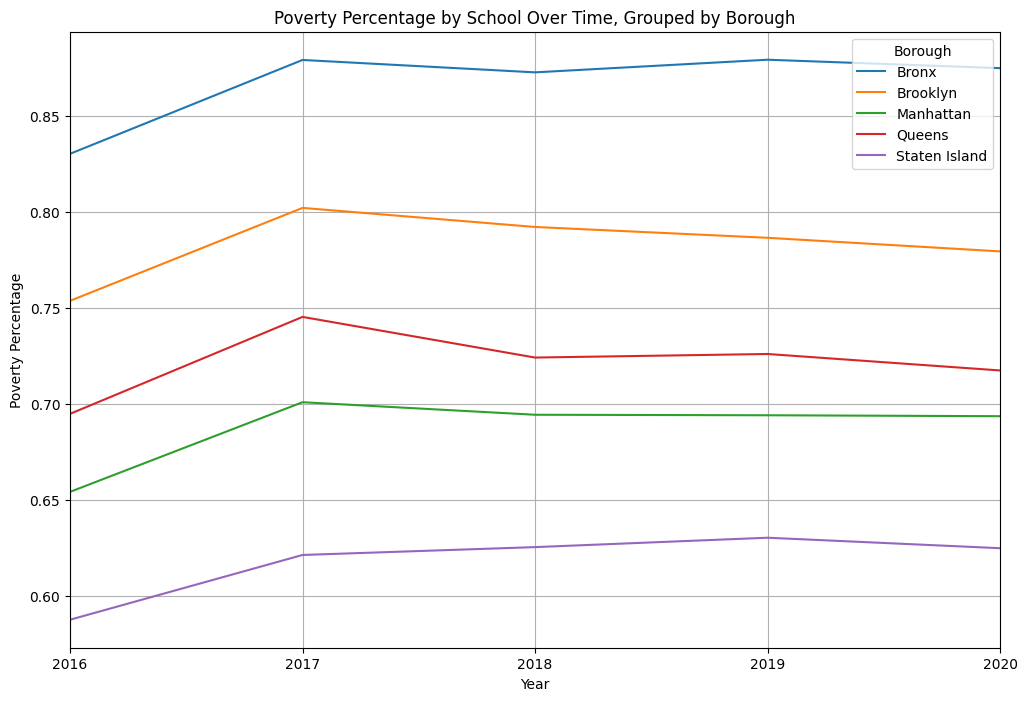

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert poverty_pct to numerical format
demo['poverty_pct'] = pd.to_numeric(demo['poverty_pct'], errors='coerce')

# Convert year to datetime format
demo['ay'] = pd.to_datetime(demo['ay'], format='%Y')

# Group by boro, school_name, and year and calculate mean poverty_pct
grouped = demo.groupby(['boro','ay'])['poverty_pct'].mean().reset_index()

# Pivot the DataFrame
pivoted = pd.pivot_table(grouped, values='poverty_pct', index='ay', columns=['boro'])

# Plot the time series and make the title 'Borough'

pivoted.plot(figsize=(12,8), grid=True)
plt.title('Poverty Percentage by School Over Time, Grouped by Borough')
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.legend(title='Borough', loc='upper right')
plt.show()


In [6]:
###################

In [20]:
# school demographics in one frame
demo2 = schools.load_school_demographics()
# subset the data to only include the columns we need
demo2 = demo2[['dbn', 'beds', 'zip', 'district', 'geo_district', 'boro', 'school_name',
       'short_name', 'ay', 'year', 'school_type', 'total_enrollment',
       'female_n', 'female_pct', 'male_n',
       'male_pct', 'asian_n', 'asian_pct', 'black_n', 'black_pct',
       'hispanic_n', 'hispanic_pct', 'multi_racial_n', 'multi_racial_pct',
       'native_american_n', 'native_american_pct', 'white_n', 'white_pct',
       'missing_race_ethnicity_data_n', 'missing_race_ethnicity_data_pct',
       'swd_n', 'swd_pct', 'ell_n', 'ell_pct', 'poverty_n', 'poverty_pct',
       'eni_pct']]


In [14]:
# create a new dataframe for each school type
charter_schools = demo2[demo2['school_type'] == 'charter']
community_schools = demo2[demo2['school_type'] == 'community']

In [15]:
# group by year and calculate the mean total enrollment for each school type
charter_schools_by_year = charter_schools.groupby('ay')['total_enrollment'].mean()
community_schools_by_year = community_schools.groupby('ay')['total_enrollment'].mean()


In [16]:
#reset the index for each dataframe
charter_schools_by_year = charter_schools_by_year.reset_index()
community_schools_by_year = community_schools_by_year.reset_index()


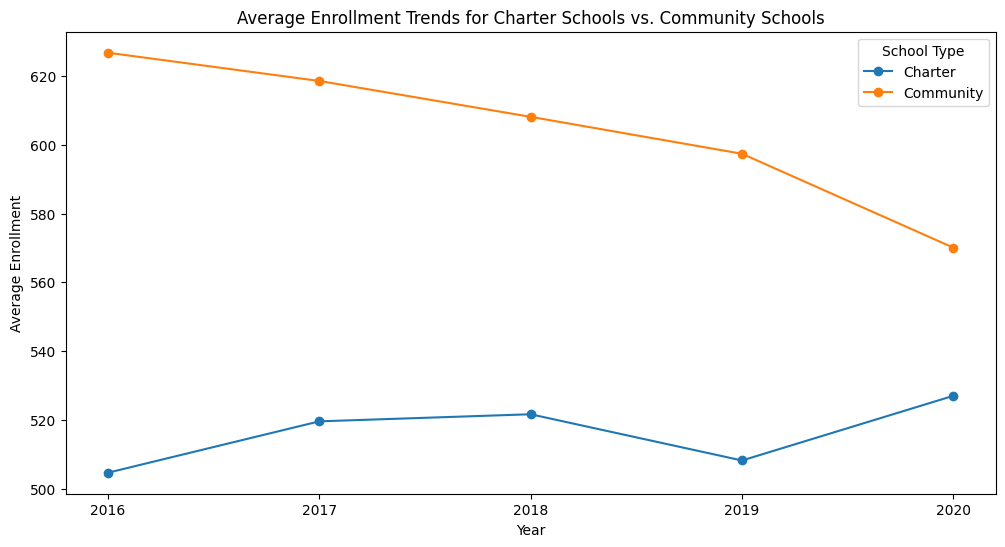

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(12, 6))
plt.plot(charter_schools_by_year['ay'], charter_schools_by_year['total_enrollment'], label='Charter', marker='o')
plt.plot(community_schools_by_year['ay'], community_schools_by_year['total_enrollment'], label='Community', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Enrollment')
plt.title('Average Enrollment Trends for Charter Schools vs. Community Schools')

# Set x-axis tick labels to integers
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend(title = 'School Type')
plt.show()





In [82]:
import plotly.graph_objects as go

# Create a line plot with interactive features
fig = go.Figure()

# Add a trace for Charter Schools
fig.add_trace(go.Scatter(x=charter_schools_by_year['ay'],
                         y=charter_schools_by_year['total_enrollment'],
                         mode='lines+markers',
                         name='Charter'))

# Add a trace for Community Schools
fig.add_trace(go.Scatter(x=community_schools_by_year['ay'],
                         y=community_schools_by_year['total_enrollment'],
                         mode='lines+markers',
                         name='Community'))

# Update the layout (title, axis labels, etc.)
fig.update_layout(title='<span style="font-weight:bold;text-decoration:underline;">Average Enrollment Trends for Charter Schools vs. Community Schools</span>',
                  title_x=0.5,
                  xaxis_title='Year',
                  yaxis_title='Average Enrollment',
                  legend_title_text='School Type',
                  xaxis=dict(dtick=1))



# Show the interactive plot
fig.show()


In [88]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# Autoregression for Charter Schools
charter_schools_series = pd.Series(charter_schools_by_year['total_enrollment'].values, index=charter_schools_by_year['ay'])
charter_schools_series.index = pd.to_datetime(charter_schools_series.index, format='%Y').to_period('A')

# Choose a lag value based on your data and domain knowledge
lag = 1

# Fit the autoregression model
charter_model = AutoReg(charter_schools_series, lags=lag, old_names=False)
charter_model_fit = charter_model.fit()

# Print model summary
print("Charter Schools Autoregression Model Summary:")
print(charter_model_fit.summary())


# Autoregression for Community Schools
community_schools_series = pd.Series(community_schools_by_year['total_enrollment'].values, index=community_schools_by_year['ay'])
community_schools_series.index = pd.to_datetime(community_schools_series.index, format='%Y').to_period('A')

# Fit the autoregression model
community_model = AutoReg(community_schools_series, lags=lag, old_names=False)
community_model_fit = community_model.fit()

# Print model summary
print("\nCommunity Schools Autoregression Model Summary:")
print(community_model_fit.summary())


Charter Schools Autoregression Model Summary:
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                    5
Model:                     AutoReg(1)   Log Likelihood                 -12.478
Method:               Conditional MLE   S.D. of innovations              5.477
Date:                Thu, 04 May 2023   AIC                             30.956
Time:                        21:52:51   BIC                             29.115
Sample:                    12-31-2017   HQIC                            26.915
                         - 12-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        811.5450    194.229      4.178      0.000     430.863    1192.227
y.L1          -0.5695      0.378     -1.506      0.132      -1.311       0.172
      

In [96]:
# Make predictions for the next year
n_future_steps = 1
charter_predictions = charter_model_fit.predict(start=len(charter_schools_series), end=len(charter_schools_series) + n_future_steps  - 1)
community_predictions = community_model_fit.predict(start=len(community_schools_series), end=len(community_schools_series) + n_future_steps - 1)

# Print the predictions
print("Predicted average enrollment for next year (Charter Schools):", charter_predictions[0])
print("Predicted average enrollment for next year (Community Schools):", community_predictions[0])


Predicted average enrollment for next year (Charter Schools): 511.42923288458036
Predicted average enrollment for next year (Community Schools): 530.4495685068825
